In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [3]:
seed = 0 
np.random.seed(seed)
tf.random.set_seed(3)

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation ='softmax'))

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [8]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor ='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05466, saving model to ./model/01-0.0547.hdf5

Epoch 00002: val_loss improved from 0.05466 to 0.03970, saving model to ./model/02-0.0397.hdf5

Epoch 00003: val_loss improved from 0.03970 to 0.03582, saving model to ./model/03-0.0358.hdf5

Epoch 00004: val_loss improved from 0.03582 to 0.03277, saving model to ./model/04-0.0328.hdf5

Epoch 00005: val_loss improved from 0.03277 to 0.03193, saving model to ./model/05-0.0319.hdf5

Epoch 00006: val_loss improved from 0.03193 to 0.03007, saving model to ./model/06-0.0301.hdf5

Epoch 00007: val_loss did not improve from 0.03007

Epoch 00008: val_loss improved from 0.03007 to 0.02952, saving model to ./model/08-0.0295.hdf5

Epoch 00009: val_loss did not improve from 0.02952

Epoch 00010: val_loss did not improve from 0.02952

Epoch 00011: val_loss did not improve from 0.02952

Epoch 00012: val_loss improved from 0.02952 to 0.02904, saving model to ./model/12-0.0290.hdf5

Epoch 00013: val_loss impro

In [10]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9925

 Test Accuracy: 0.9925


In [11]:
y_vloss = history.history['val_loss']

In [12]:
y_loss = history.history['loss']

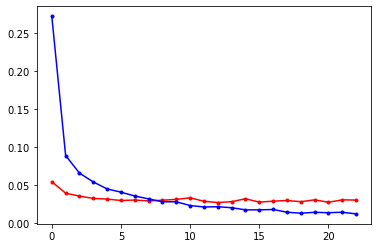

In [13]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = ".", c="red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = ".", c="blue", label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show